In [6]:
!pip install sympy
import numpy as np
import matplotlib.pyplot as plt

     ---------------------------------------- 6.4/6.4 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 536.2/536.2 kB 2.4 MB/s eta 0:00:00


In [2]:
def runge_kutta_4(func, y0, t0, tn, h):
    
    t_values = np.arange(t0, tn + h, h)
    y_values = [y0]
    # the last one.
    for t in t_values[:-1]:
        k1 = h * func(t, y_values[-1])
        k2 = h * func(t + h/2, y_values[-1] + k1/2)
        k3 = h * func(t + h/2, y_values[-1] + k2/2)
        k4 = h * func(t + h, y_values[-1] + k3)
       # appends new to the y_values list.
        y_new = y_values[-1] + (k1 + 2*k2 + 2*k3 + k4)/6
        y_values.append(y_new)

    return t_values, np.array(y_values)
    
    

def example_ode(t, y):
    return t**2-t

# initial condition
y0 = 1.0
t0 = 2.0
tn = 10.0
h = 0.1

t_values, y_values = runge_kutta_4(example_ode, y0, t0, tn, h)


# Runge-Kutta method

t_v = t_values
y_v = y_values
# Visualization
def visulize_runge(t_v,y_v):
    plt.plot(t_values, y_values, label='Runge-Kutta 4')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title('Runge-Kutta 4 Method')
    plt.legend()
    plt.show()

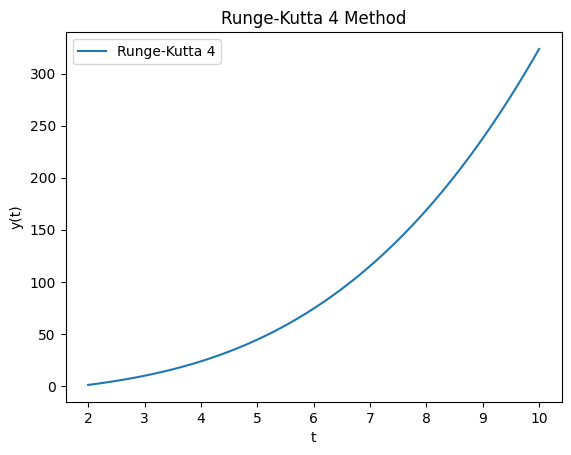

In [3]:
def example_ode(t, y):
    return t**2-t+ 5

t_values, y_values = runge_kutta_4(example_ode, y0, t0, tn, h)
# Visualization

visulize_runge(t_v,y_v)

In [7]:
import sympy as sp

def analytical_solution(example_ode, t, t0, y0, t_values):
    # Define the symbolic variable
    T = sp.symbols('T')
    
    # Integrate dy/dt with respect to t
    y = sp.integrate(example_ode(T, y0), T)
    
    # Add the initial condition
    y += y0 - y.subs(T, t0)
    
    # Calculate y values at specified t values
    y_values = [y.subs(T, t_val) for t_val in t_values]
    
    return y_values

# Example usage
y_values_analytical = analytical_solution(example_ode, t_values, t0, y0, t_values)
print("Analytical solution:", y_values_analytical)

Analytical solution: [1.00000000000000, 1.71533333333333, 2.46266666666667, 3.24400000000000, 4.06133333333334, 4.91666666666667, 5.81200000000001, 6.74933333333334, 7.73066666666667, 8.75800000000001, 9.83333333333334, 10.9586666666667, 12.1360000000000, 13.3673333333334, 14.6546666666667, 16.0000000000000, 17.4053333333334, 18.8726666666667, 20.4040000000000, 22.0013333333334, 23.6666666666667, 25.4020000000000, 27.2093333333334, 29.0906666666667, 31.0480000000000, 33.0833333333334, 35.1986666666667, 37.3960000000001, 39.6773333333334, 42.0446666666667, 44.5000000000001, 47.0453333333334, 49.6826666666667, 52.4140000000001, 55.2413333333334, 58.1666666666668, 61.1920000000001, 64.3193333333334, 67.5506666666668, 70.8880000000001, 74.3333333333335, 77.8886666666668, 81.5560000000001, 85.3373333333335, 89.2346666666668, 93.2500000000001, 97.3853333333335, 101.642666666667, 106.024000000000, 110.531333333334, 115.166666666667, 119.932000000000, 124.829333333334, 129.860666666667, 135.02

In [8]:
# numerical solution

t_values, y_values = runge_kutta_4(example_ode, y0, t0, tn, h)

# Calculate analytical solution values
y_analytical = analytical_solution(example_ode, t_values, t0, y0, t_values)

# Calculate absolute error 
absolute_error = np.abs(y_values - y_analytical)

# Calculate relative error
relative_error_percentage = (absolute_error / y_analytical) * 100

# Calculate mean absolute error and mean relative error
mean_absolute_error = np.mean(absolute_error)
mean_relative_error_percentage = np.mean(relative_error_percentage)

print("Mean Absolute Error:", mean_absolute_error)
print("Mean Relative Error (%):", mean_relative_error_percentage)

Mean Absolute Error: 9.28639881042020e-14
Mean Relative Error (%): 8.82418771616140e-14


In [9]:
def runge_kutta_4(func, y0, t0, tn, h):
    t_values = np.arange(t0, tn + h, h)
    y_values = [y0]
    for t in t_values[:-1]:
        k1 = h * func(t, y_values[-1])
        k2 = h * func(t + h/2, np.add(y_values[-1], np.divide(k1, 2)))
        k3 = h * func(t + h/2, np.add(y_values[-1], np.divide(k2, 2)))
        k4 = h * func(t + h, np.add(y_values[-1], k3))
        y_new = np.add(y_values[-1], np.divide(np.add(k1, 2*np.add(k2, 2*np.add(k3, k4))), 6))
        y_values.append(y_new)
    return t_values, np.array(y_values)

def SIR_model(t, state):
    S, I, R = state
    dSdt = -beta * S * I / population
    dIdt = beta * S * I / population - gamma * I
    dRdt = gamma * I
    
    print("Susceptible rate" ,dSdt ,"\n"
          "infection rate" ,dIdt , "\n"
           "recovery rate ",dRdt,"\n")
    return [dSdt, dIdt, dRdt]

# Parameters
beta = 0.4  # infection rate
gamma = 0.1  # recovery rate
population = 1000  # total population
initial_infected = 1  # initial number of infected individuals
days = 100  # number of days
initial_S = population - initial_infected
initial_I = initial_infected
initial_R = 0  # Initial number of recovered individuals

# Runge-Kutta method
t_values, y_values = runge_kutta_4(SIR_model, [initial_S, initial_I, initial_R], 0, days, 1)

Susceptible rate -0.3996 
infection rate 0.2996 
recovery rate  0.1 

Susceptible rate -0.459368187984 
infection rate 0.34438818798399995 
recovery rate  0.11498 

Susceptible rate -0.4683010662238187 
infection rate 0.35108165682461867 
recovery rate  0.1172194093992 

Susceptible rate -0.5396391448749391 
infection rate 0.40453097919247727 
recovery rate  0.13510816568246187 

Susceptible rate -0.6661259740157741 
infection rate 0.49927885868183436 
recovery rate  0.16684711533393976 

Susceptible rate -0.7655373096432391 
infection rate 0.5737262513752076 
recovery rate  0.19181105826803146 

Susceptible rate -0.7803547863977657 
infection rate 0.5848213584950656 
recovery rate  0.19553342790270012 

Susceptible rate -0.8989086517567303 
infection rate 0.673579400573284 
recovery rate  0.2253292511834463 

Susceptible rate -1.108985914949555 
infection rate 0.8307998929871876 
recovery rate  0.27818602196236725 

Susceptible rate -1.2738755628784375 
infection rate 0.95414954626671

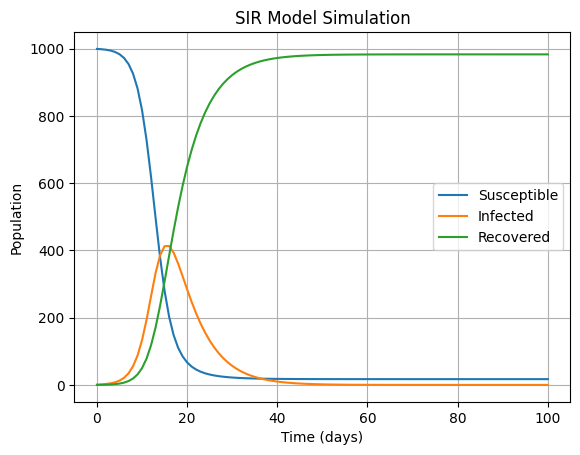

In [10]:
# Visualization
plt.plot(t_values, y_values[:, 0], label='Susceptible')
plt.plot(t_values, y_values[:, 1], label='Infected')
plt.plot(t_values, y_values[:, 2], label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SIR Model Simulation')
plt.legend()
plt.grid(True)
plt.show()
